In [61]:
import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt

from datetime import datetime, timedelta 

from statsmodels.tsa.stattools import acf , pacf 
from statsmodels.tsa.arima.model import ARIMA 
from time import time 

In [62]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [63]:
stocks = pd.read_csv('infosys_stock_data.csv' ) 

In [64]:
stocks.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,8-July-2024,1642.00,1666.00,1640.00,1661.65,1655.504766,99345,5692,164466121.0,NaN,NaN,26.00,19.65
1,5-July-2024,1649.55,1665.00,1633.20,1647.20,1650.350227,503374,24052,830743395.0,59234.0,11.77,31.80,-2.35
2,4-July-2024,1627.65,1659.15,1627.60,1649.15,1652.178574,411364,23125,679646787.0,268884.0,65.36,31.55,21.50
3,3-July-2024,1624.95,1635.50,1606.25,1627.60,1622.636848,120360,4933,195300571.0,45155.0,37.52,29.25,2.65
4,2-July-2024,1598.00,1633.80,1589.00,1621.00,1618.739702,221285,10618,358202815.0,106826.0,48.28,44.80,23.00


In [65]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.set_index('Date', inplace=True)

In [66]:
duplicates = stocks[stocks.index.duplicated(keep=False)]

In [67]:
stocks_unique = stocks[~stocks.index.duplicated(keep='first')]

print(stocks_unique)

            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2024-07-08     1642.00     1666.00    1640.00      1661.65  1655.504766   
2024-07-05     1649.55     1665.00    1633.20      1647.20  1650.350227   
2024-07-04     1627.65     1659.15    1627.60      1649.15  1652.178574   
2024-07-03     1624.95     1635.50    1606.25      1627.60  1622.636848   
2024-07-02     1598.00     1633.80    1589.00      1621.00  1618.739702   
...                ...         ...        ...          ...          ...   
2004-08-31     1575.00     1589.90    1564.00      1574.90  1578.061084   
2004-08-30     1560.00     1580.00    1560.00      1575.35  1571.420231   
2004-08-27     1550.00     1570.00    1541.00      1564.15  1554.187726   
2004-08-26     1545.00     1557.00    1533.35      1545.20  1545.600120   
2004-08-25     1562.00     1564.70    1515.00      1535.35  1530.355113   

            No.of Shares

In [68]:
duplicates = stocks_unique[stocks_unique.index.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Open Price, High Price, Low Price, Close Price, WAP, No.of Shares, No. of Trades, Total Turnover (Rs.), Deliverable Quantity, % Deli. Qty to Traded Qty, Spread High-Low, Spread Close-Open]
Index: []


In [69]:
stocks_unique.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2024-07-08,1642.00,1666.00,1640.00,1661.65,1655.504766,99345,5692,164466121.0,NaN,NaN,26.00,19.65
2024-07-05,1649.55,1665.00,1633.20,1647.20,1650.350227,503374,24052,830743395.0,59234.0,11.77,31.80,-2.35
2024-07-04,1627.65,1659.15,1627.60,1649.15,1652.178574,411364,23125,679646787.0,268884.0,65.36,31.55,21.50
2024-07-03,1624.95,1635.50,1606.25,1627.60,1622.636848,120360,4933,195300571.0,45155.0,37.52,29.25,2.65
2024-07-02,1598.00,1633.80,1589.00,1621.00,1618.739702,221285,10618,358202815.0,106826.0,48.28,44.80,23.00


In [70]:
stocks_unique = stocks_unique[::-1]

In [71]:
stocks_unique.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2004-08-25,1562.0,1564.7,1515.00,1535.35,1530.355113,490878,14661,751217657.0,131253.0,26.74,49.70,-26.65
2004-08-26,1545.0,1557.0,1533.35,1545.20,1545.600120,487164,10906,752960737.0,164446.0,33.76,23.65,0.20
2004-08-27,1550.0,1570.0,1541.00,1564.15,1554.187726,255814,8301,397582979.0,53515.0,20.92,29.00,14.15
2004-08-30,1560.0,1580.0,1560.00,1575.35,1571.420231,204078,6643,320692298.0,42130.0,20.64,20.00,15.35
2004-08-31,1575.0,1589.9,1564.00,1574.90,1578.061084,248201,8354,391676339.0,39998.0,16.12,25.90,-0.10


In [72]:
stocks_unique.drop(columns=['Open Price','Low Price', 'High Price', 'WAP','No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)','Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low','Spread Close-Open'] , inplace=True)

In [73]:
stocks_unique.head()

,Close Price
Date,
2004-08-25,1535.35
2004-08-26,1545.20
2004-08-27,1564.15
2004-08-30,1575.35
2004-08-31,1574.90


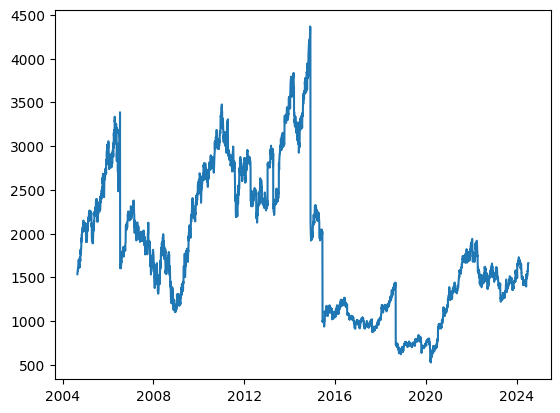

In [74]:
plt.plot(stocks_unique)

In [75]:
stocks_uniques = stocks_unique.asfreq(pd.infer_freq(stocks_unique.index))

In [76]:
stocks_uniques = stocks_uniques.ffill()

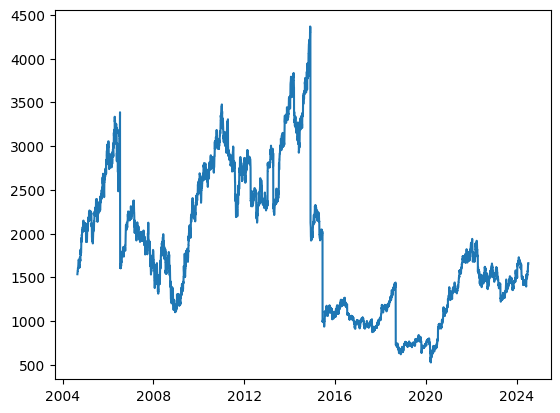

In [77]:
plt.plot(stocks_uniques['Close Price'])

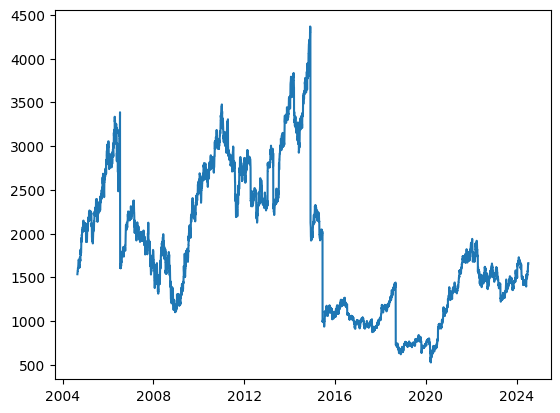

In [78]:
plt.plot(stocks_uniques['Close Price'])

In [79]:
first_diff = stocks_uniques.diff()[1:]

In [80]:
from statsmodels.tsa.stattools import adfuller 

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistics' , result[0])
    print('p-value' , result[1])

In [81]:
# Check for missing values and sum them up
missing_values_count = stocks_uniques.isna().sum()

print(missing_values_count)


Close Price    0
dtype: int64


In [82]:
perform_adf_test(stocks_uniques['Close Price'])

ADF Statistics -2.410606277036286
p-value 0.13876521540392317


In [83]:
perform_adf_test(first_diff['Close Price'])

ADF Statistics -34.531938143579055
p-value 0.0


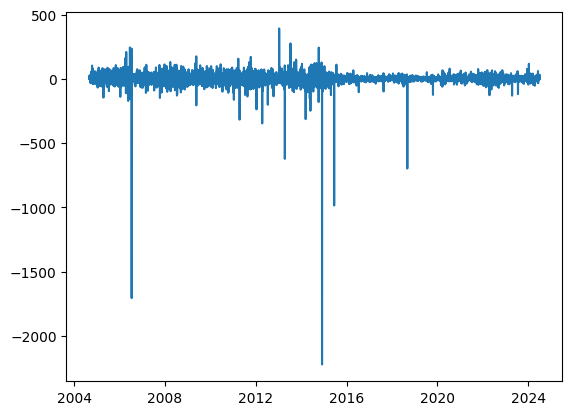

In [84]:
plt.plot(first_diff['Close Price'])

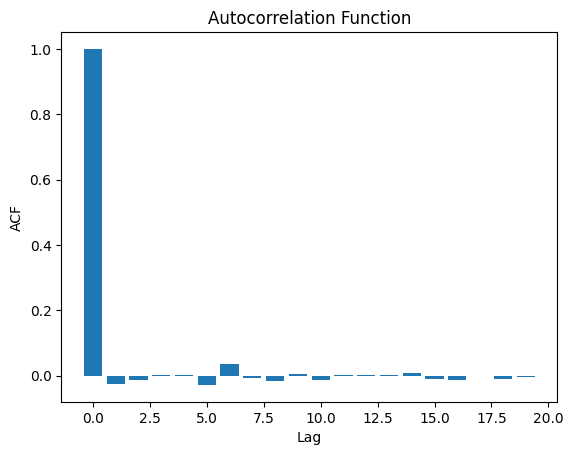

In [85]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Compute the ACF values
acf_vals = acf(first_diff['Close Price'])

# Define the number of lags
num_lags = 20

# Ensure num_lags does not exceed the length of acf_vals
num_lags = min(num_lags, len(acf_vals))

# Plot the ACF values
plt.bar(range(num_lags), acf_vals[:num_lags])
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

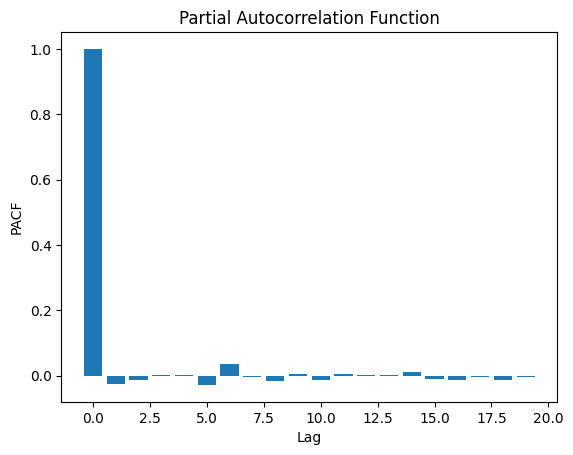

In [86]:
pacf_vals = pacf(first_diff['Close Price'])

# Define the number of lags
num_lags = 20

# Ensure num_lags does not exceed the length of acf_vals
num_lags = min(num_lags, len(pacf_vals))

# Plot the ACF values
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.show()

In [87]:
train_end = datetime(2023,12,28)
test_end = datetime(2024, 7,8)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=3):test_end]

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
my_order = (0,1,1)

my_seasonal_order = (0,1,1,30)

model = SARIMAX(train_data , order = my_order , seasonal_order=my_seasonal_order)

In [90]:
start = time()
model_fit = model.fit()

end = time()

print(end - start)

32.763838052749634


In [91]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Close Price   No. Observations:                 7064
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 30)   Log Likelihood              -37178.501
Date:                            Mon, 08 Jul 2024   AIC                          74363.002
Time:                                    19:09:10   BIC                          74383.577
Sample:                                08-26-2004   HQIC                         74370.090
                                     - 12-28-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9992      0.002   -490.845      0.000      -1.003      -0.995
ma.S.L30      -0.9965      0.011   

In [92]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
predictions_aligned = predictions.reindex(test_data.index)

# Compute residuals
residuals = test_data['Close Price'] - predictions_aligned

# Print the results to debug
print("Test Data:")
print(test_data)
print("\nPredictions:")
print(predictions_aligned)
print("\nResiduals:")
print(residuals)

Test Data:
            Close Price
Date                   
2023-12-31         0.00
2024-01-01         8.40
2024-01-02       -16.30
2024-01-03       -44.75
2024-01-04        22.00
...                 ...
2024-07-04        21.55
2024-07-05        -1.95
2024-07-06         0.00
2024-07-07         0.00
2024-07-08        14.45

[191 rows x 1 columns]

Predictions:
Date
2023-12-31    3.155878
2024-01-01    1.188758
2024-01-02   -0.797993
2024-01-03    1.370158
2024-01-04    1.853820
                ...   
2024-07-04   -2.454610
2024-07-05    0.971963
2024-07-06   -1.599702
2024-07-07   -1.672783
2024-07-08   -3.644634
Freq: D, Name: predicted_mean, Length: 191, dtype: float64

Residuals:
Date
2023-12-31    -3.155878
2024-01-01     7.211242
2024-01-02   -15.502007
2024-01-03   -46.120158
2024-01-04    20.146180
                ...    
2024-07-04    24.004610
2024-07-05    -2.921963
2024-07-06     1.599702
2024-07-07     1.672783
2024-07-08    18.094634
Freq: D, Length: 191, dtype: float64


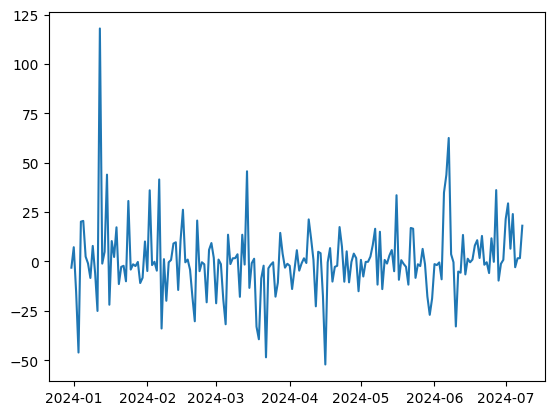

In [93]:
plt.plot(residuals)

In [94]:
end_date = datetime(2024,7,8)
start_date = datetime(2004,8,25)

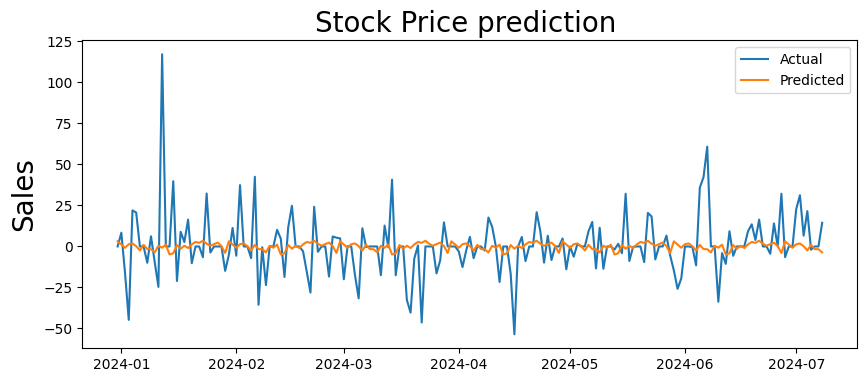

In [95]:
plt.figure(figsize=(10,4))

# plt.plot(train_data)

plt.plot(test_data, label='Actual')

plt.plot(predictions_aligned, label='Predicted')

plt.title('Stock Price prediction ' , fontsize = 20)

plt.ylabel('Sales' , fontsize = 20)

plt.legend()



In [96]:
print(np.mean(abs(test_data['Close Price']/predictions_aligned)))

10.737372144720421


In [97]:
print(np.sqrt(np.mean(residuals**2)))

18.252745435117895


In [98]:
mae = np.mean(abs(test_data['Close Price'] - predictions_aligned))
print(f'MAE: {mae}')


MAE: 11.28052966338041


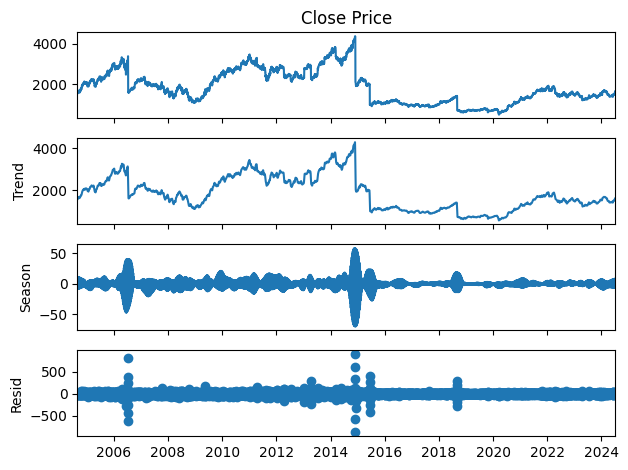

            Close Price  Deseasonalized
Date                                   
2004-08-25      1535.35      -25.689619
2004-08-26      1545.20      -31.117827
2004-08-27      1564.15       -5.769683
2004-08-28      1564.15       -0.879900
2004-08-29      1564.15        2.486520
2004-08-30      1575.35        4.088680
2004-08-31      1574.90       -7.291665
2004-09-01      1580.30       -4.266226
2004-09-02      1603.10       -1.159033
2004-09-03      1606.70        4.639005
2004-09-04      1606.70        5.342337
2004-09-05      1606.70        5.799025
2004-09-06      1607.15       -4.020665
2004-09-07      1616.45       -4.567134
2004-09-08      1624.45        0.834543
2004-09-09      1621.95      -23.057135
2004-09-10      1652.10        5.614751
2004-09-11      1652.10        1.017559
2004-09-12      1652.10       -3.864108
2004-09-13      1675.20        5.252230


In [99]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Seasonal decomposition using STL
stl = sm.tsa.STL(stocks_uniques['Close Price'], seasonal=31)
result = stl.fit()

# Plot the decomposed components
result.plot()
plt.show()

# The deseasonalized series is the residual component
stocks_uniques['Deseasonalized'] = result.resid

print(stocks_uniques.head(20))

In [100]:
model = SARIMAX(stocks_uniques['Close Price'], 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 31),  # Seasonal parameter set to 31 for monthly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
fitted_model = model.fit()

# Forecast future values
# forecast_steps = 30  # Number of steps to forecast
# forecast = fitted_model.get_forecast(steps=forecast_steps)
# forecast_mean = forecast.predicted_mean

# print(forecast_mean)


In [101]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

predictions = fitted_model.predict(start=pred_start_date, end=pred_end_date)
predictions_aligned = predictions.reindex(test_data.index)

# Compute residuals
residuals = test_data['Close Price'] - predictions_aligned

# Print the results to debug
print("Test Data:")
print(test_data)
print("\nPredictions:")
print(predictions_aligned)
print("\nResiduals:")
print(residuals)

Test Data:
            Close Price
Date                   
2023-12-31         0.00
2024-01-01         8.40
2024-01-02       -16.30
2024-01-03       -44.75
2024-01-04        22.00
...                 ...
2024-07-04        21.55
2024-07-05        -1.95
2024-07-06         0.00
2024-07-07         0.00
2024-07-08        14.45

[191 rows x 1 columns]

Predictions:
Date
2023-12-31    1543.045027
2024-01-01    1535.397895
2024-01-02    1551.194262
2024-01-03    1536.428428
2024-01-04    1494.117904
                 ...     
2024-07-04    1627.043704
2024-07-05    1641.036921
2024-07-06    1647.188263
2024-07-07    1647.966099
2024-07-08    1650.073859
Freq: D, Name: predicted_mean, Length: 191, dtype: float64

Residuals:
Date
2023-12-31   -1543.045027
2024-01-01   -1526.997895
2024-01-02   -1567.494262
2024-01-03   -1581.178428
2024-01-04   -1472.117904
                 ...     
2024-07-04   -1605.493704
2024-07-05   -1642.986921
2024-07-06   -1647.188263
2024-07-07   -1647.966099
2024-07-08  

In [102]:


# Slice the DataFrame to get the range
selected_range = stocks_uniques[pred_start_date:pred_end_date]


In [103]:
selected_range.head()

,Close Price,Deseasonalized
Date,,
2023-12-31,1542.85,-1.052824
2024-01-01,1551.25,16.157626
2024-01-02,1534.95,9.256482
2024-01-03,1490.20,-29.192206
2024-01-04,1512.20,-8.235744


In [104]:
selected_range.tail()

,Close Price,Deseasonalized
Date,,
2024-07-04,1649.15,15.251107
2024-07-05,1647.20,12.684002
2024-07-06,1647.20,14.577585
2024-07-07,1647.20,17.327439
2024-07-08,1661.65,30.084414


C:\Users\user\AppData\Local\Temp\ipykernel_21772\1940210768.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


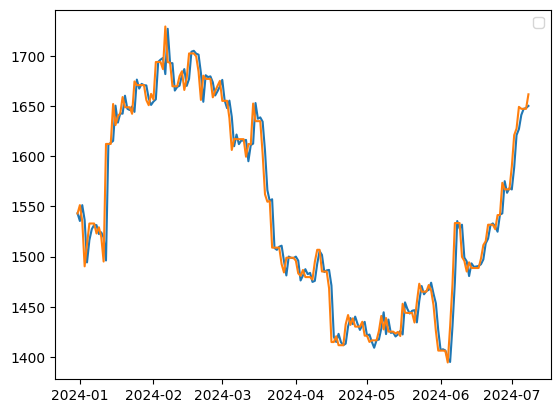

In [105]:
plt.plot(predictions_aligned)
plt.plot(selected_range['Close Price'])
plt.legend()

In [106]:
datafr = pd.DataFrame(predictions_aligned)
datafr

,predicted_mean
Date,
2023-12-31,1543.045027
2024-01-01,1535.397895
2024-01-02,1551.194262
2024-01-03,1536.428428
2024-01-04,1494.117904
...,...
2024-07-04,1627.043704
2024-07-05,1641.036921
2024-07-06,1647.188263


In [107]:
selected_range

,Close Price,Deseasonalized
Date,,
2023-12-31,1542.85,-1.052824
2024-01-01,1551.25,16.157626
2024-01-02,1534.95,9.256482
2024-01-03,1490.20,-29.192206
2024-01-04,1512.20,-8.235744
...,...,...
2024-07-04,1649.15,15.251107
2024-07-05,1647.20,12.684002
2024-07-06,1647.20,14.577585


In [108]:
print(np.mean(abs(test_data['Close Price']/datafr['predicted_mean'])))

mae = np.mean(abs(test_data['Close Price'] - datafr))
print(f'MAE: {mae}')

print(np.sqrt(np.mean(residuals**2)))

0.006856467229257914
MAE: nan
1548.4200401243975
